## Project 1. 당뇨병 수치

In [69]:
from IPython.display import display, Image
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
from sklearn.datasets import load_diabetes

In [70]:
# 데이터 가져오기
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df["target"] = diabetes.target

In [71]:
df_X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']].values 
df_y = df['target'].values
X = df_X
y = df_y

In [72]:
# 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# 모델 준비하기
w = np.random.rand(10)
b = np.random.rand()

def model(X, w, b):
    predictions = 0
    for i in range(10):
        predictions += X[:,i]*w[i]
    predictions += b
    return predictions

In [74]:
# 손실함수 

def MSE(a,b):
    mse = ((a-b)**2).mean()
    return mse

def loss(X, w, b, y):
    predictions = model(X, w, b)
    L = MSE(predictions, y)
    return L

In [75]:
# 기울기 gradient 함수

def gradient(X, w, b, y):
    # N은 가중치의 개수
    N = len(w)
    
    # y_pred 준비
    y_pred = model(X, w, b)
    
    # 공식에 맞게 gradient 계산
    dW = 1/N * 2 * X.T.dot(y_pred - y)
        
    # b의 gradient 계산
    db = 2 * (y_pred - y).mean()
    return dW, db

dW, db = gradient(X, w, b, y)
print("dW:", dW)
print("db:", db)

dW: [ -60.39456697  -13.64820004 -189.55841696 -142.51070058  -68.04654018
  -55.79862725  127.64952096 -138.88378641 -182.72779923 -123.3581902 ]
db: -303.88323819433583


In [84]:
# 하이퍼 파라미터 학습률 설정
LEARNING_RATE = 0.001

Iteration 100 : Loss 2894.0801
Iteration 200 : Loss 2894.0758
Iteration 300 : Loss 2894.0715
Iteration 400 : Loss 2894.0672
Iteration 500 : Loss 2894.0629
Iteration 600 : Loss 2894.0586
Iteration 700 : Loss 2894.0543
Iteration 800 : Loss 2894.0500
Iteration 900 : Loss 2894.0457
Iteration 1000 : Loss 2894.0414
Iteration 1100 : Loss 2894.0371
Iteration 1200 : Loss 2894.0328
Iteration 1300 : Loss 2894.0285
Iteration 1400 : Loss 2894.0242
Iteration 1500 : Loss 2894.0200
Iteration 1600 : Loss 2894.0157
Iteration 1700 : Loss 2894.0114
Iteration 1800 : Loss 2894.0071
Iteration 1900 : Loss 2894.0028
Iteration 2000 : Loss 2893.9985
Iteration 2100 : Loss 2893.9942
Iteration 2200 : Loss 2893.9899
Iteration 2300 : Loss 2893.9856
Iteration 2400 : Loss 2893.9813
Iteration 2500 : Loss 2893.9770
Iteration 2600 : Loss 2893.9727
Iteration 2700 : Loss 2893.9684
Iteration 2800 : Loss 2893.9641
Iteration 2900 : Loss 2893.9597
Iteration 3000 : Loss 2893.9554
Iteration 3100 : Loss 2893.9511
Iteration 3200 : 

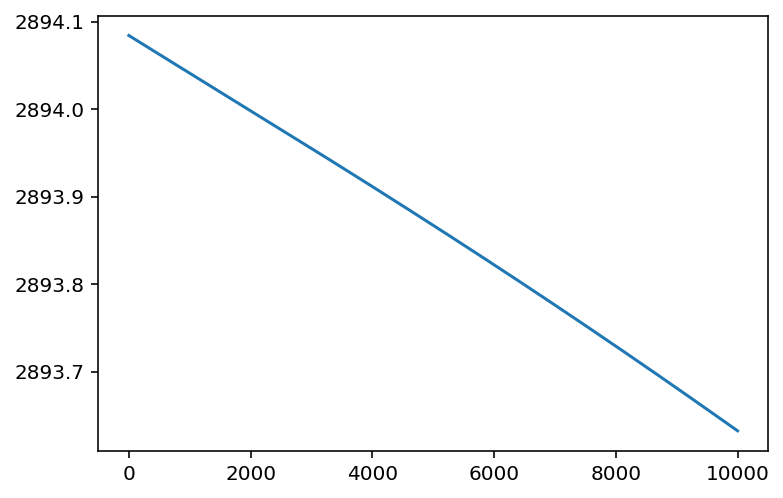

In [85]:
# 모델 학습
losses = []
for i in range(1, 10001):
    dW, db = gradient(X_train, w, b, y_train)
    w -= LEARNING_RATE * dW
    b -= LEARNING_RATE * db
    L = loss(X, w, b, y)
    losses.append(L)
    if i % 100 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))
        
plt.plot(losses)
plt.show()

In [88]:
# test 성능
w, b
prediction = model(X_test, w, b)
mse = loss(X_test, w, b, y_test)
mse

2884.203446804558

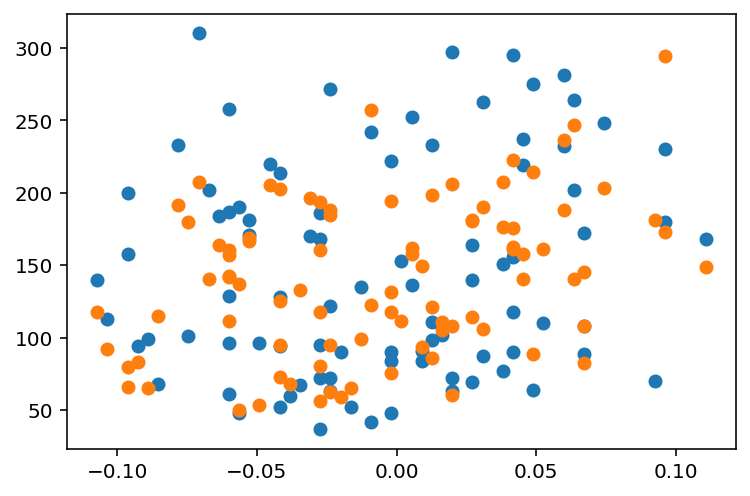

In [86]:
# 시각화
plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

## Project 2. 자전거 타는 사람

In [231]:
# 데이터 가져오기
train = pd.read_csv('~/workplace/aiffel/Exploration/05. bike_regression/bike-sharing-demand/train.csv')
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [230]:
# datetime 컬럼을 datetime 자료형으로 변환하고 연, 월, 일, 시, 분, 초까지 6가지 컬럼 생성하기
import datetime
datetime = pd.to_datetime(train['datetime'])
train['year'] = pd.DatetimeIndex(train['datetime']).year
train['month'] = pd.DatetimeIndex(train['datetime']).month
train['day'] = pd.DatetimeIndex(train['datetime']).day
train['hour'] = pd.DatetimeIndex(train['datetime']).hour
train['minute'] = pd.DatetimeIndex(train['datetime']).minute
train['second'] = pd.DatetimeIndex(train['datetime']).second
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,0,0
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,0,0
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,0,0
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,0,0


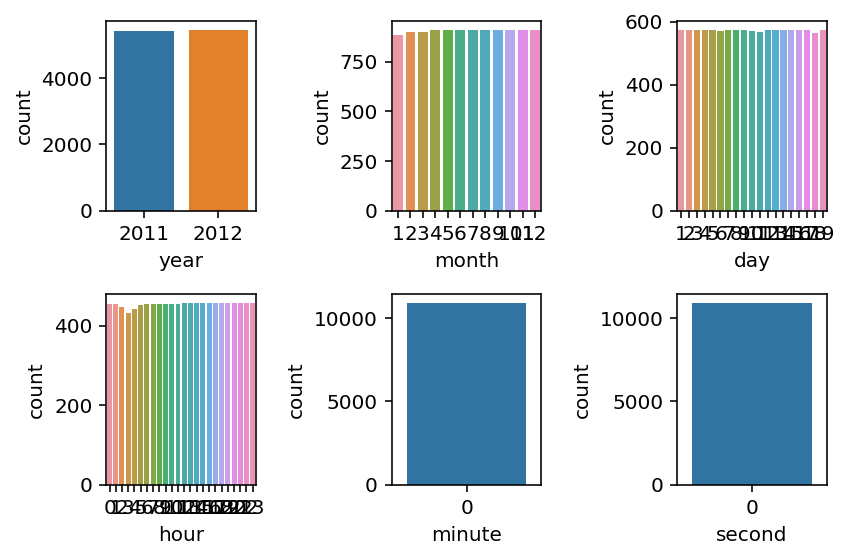

In [229]:
# year, month, day, hour, minute, second 데이터 개수 시각화하기
import seaborn as sns

plt.subplot(2,3,1)
sns.countplot(train['year'], data = train)

plt.subplot(2,3,2)
sns.countplot(train['month'], data = train)

plt.subplot(2,3,3)
sns.countplot(train['day'], data = train)

plt.subplot(2,3,4)
sns.countplot(train['hour'], data = train)

plt.subplot(2,3,5)
sns.countplot(train['minute'], data = train)

plt.subplot(2,3,6)
sns.countplot(train['second'], data = train)

plt.tight_layout()
plt.show()

In [225]:
# X, y 컬럼 선택 및 train/test 데이터 분리 
from sklearn.model_selection import train_test_split

X = train[['season', 'holiday', 'workingday', 'humidity','atemp', 'temp', 'year', 'month', 'hour']].values
y = train['count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [226]:
# LinearRegression 모델 학습

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [227]:
# 학습된 모델로 X_test에 대한 예측값 출력 및 손실함수값 계산

predictions = model.predict(X_test)
print("예측값: ", predictions)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5 
print("rmse: ", rmse)

예측값:  [250.19517673  50.16573174 201.14644578 ... 311.17789547  38.45053081
 248.68450235]
rmse:  141.40260595010886


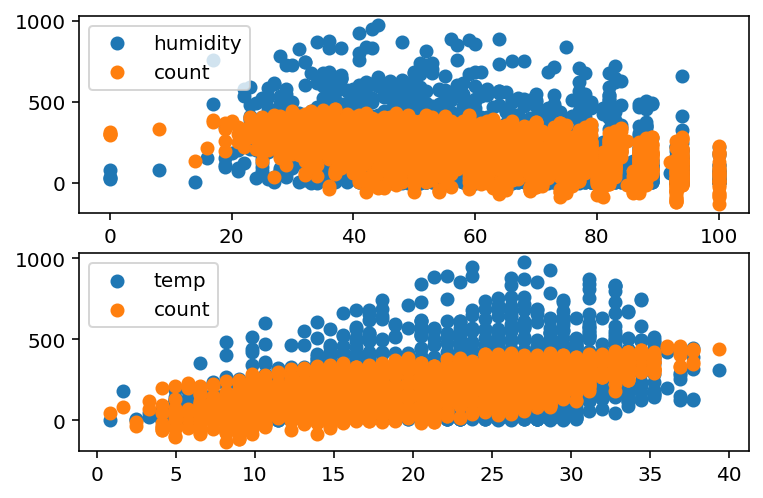

In [228]:
# x축은 temp 또는 humidity로, y축은 count로 예측 결과 시각화하기
plt.subplot(2,1,1)
plt.scatter(X_test[:, 3], y_test, label="humidity")
plt.scatter(X_test[:, 3], predictions, label="count")
plt.legend()

plt.subplot(2,1,2)
plt.scatter(X_test[:, 5], y_test, label="temp")
plt.scatter(X_test[:, 5], predictions, label="count")
plt.legend()
plt.show()

### 평가

처음 어려움을 겪었던 부분은 프로젝트를 시작하기 전, 미분과 통계 개념 이해하기였습니다. 기초가 없었기 때문에 시간이 많이 걸렸습니다. 특히 미분은 단순풀이를 위함이 아니라 앞으로 전체 흐름을 이해하기 위해서 개별 공부가 더 필요하다고 느꼈습니다. 다음 문제는 데이터를 자료형으로 만들기였습니다. 해결하고 나니 왜 어려워했는지 이해가 안되는데 프로젝트를 시작도 하지 못해서 고민하면서 pandas로 자료형 만드는 법을 계속 찾았습니다. 
가장 어려웠던 부분은 to_timedate을 응용해서 새로운 칼럼 생성하는 부분이었습니다. 여전히 pandas의 범위 지정에 어려움을 겪어서 컬럼 안에 컬럼을 여러 개 만드는 문제를 만들며 당황스러운 시간을 보냈고 지금은 어느 정도 이해가 됐습니다. subplot과 countplot을 함께 이용하는 부분에서는 특별한 방법이 필요한 줄 알고 많은 시간을 써버렸습니다. 마지막으로 plt.scatter(X_test[:, 5], y_test, label="temp") 에서 X_test의 해당 컬럼 인덱스 값을 지정해야 한다는 걸 이해하지 못해서 괴상한 그래프를 만들고 고민했었습니다. 

numpy와 pandas 복습을 다시 해야겠다는 생각이 드는 한편, 딥러닝 풀잎스쿨 때 제대로 이해하지 못하고 지나간 loss 함수와 gradient의 개념을 확실하게 이해할 수 있는 시간이었습니다! 
